# Titanic - Exploratory Data Analysis - 08

## Introduction

The purpose of this analysis is to predict if a passenger survived the Titanic disaster. In this project, we will clean up our data by removing any low varying features, features with a high amount of missing values, or features identified as unnecessary. Then, we will explore our model options and identify which of the models performs "best". Finally, we will use our resulting model to predict which passengers survived the Titanic disaster.

On April 15, 1912, ran into an iceberg killing 1,502 of 2,224 passengers and crew.

Of these people aboard the Titanic, we are provided with data on 1,309 passengers -- 891 in the training set and 418 in the test set.

Here are some questions we should try to answer during our analysis that could help us understand what a predictive model could look like:
 * What was the survival rate of women versus men?
 * What was the survival rate of children versus adults?
 * Did passenger socio-economic status play a role in survival?
 * How does age affect a passengers survival?
    * What if age is compounded with sex?
    * Or with class?
 * What data is not needed?
    * Which features have a low amount of variance?

### Data Dictionary

The following list describes each of the columns available in the data sets provided:
  * Categorical
    * Sex: Sex of passenger
        * male
        * female 
    * Ticket: Ticket number of passenger
    * Cabin: Room where passenger stayed
        * Compound field where first alpha character designated the section of the ship and the following numbers was the room number
        * Essentially, it's the location of a passenger's room on the ship
    * Embarked: Port of Embarkation
        * C = Cherbourg
        * Q = Queenstown
        * S = Southampton
  * Numerical
    * Survival: Integer boolean indicating if passenger survived - target variable
        * 0 = No
        * 1 = Yes
    * PassengerId : Unique integer value corresponding to each passenger
    * Pclass: Ticket class - proxy for socio-economic status
        * 1 = 1st (upper)
        * 2 = 2nd (middle)
        * 3 = 3rd (lower)
    * Age: Age in years - fractional if less than 1
        * If the age is estimated, it is in the form of xx.5
    * SibSp: \# of siblings / spouses aboard the Titanic
        * Sibling = brother, sister, stepbrother, stepsister
        * Spouse = husband, wife (mistresses and fiances were ignored)
    * Parch: \# of parents / children aboard the Titanic
        * Parent = mother, father
        * Child = daughter, son, stepdaughter, stepson
        * Some children travelled only with a nanny, therefore Parch=0 for them
    * Fare: Passenger fare

Since the target variable is a label of either survived (1) or died (0), we need a binary classification model to help us identify which passengers survived or died the Titanic disaster.

In [1]:
# Import libraries
import os
import sys

import scipy
import pandas as pd
import numpy as np

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from IPython.core.interactiveshell import InteractiveShell

if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
from Titanic.Code.DataPrep.titanic import Titanic
from Titanic.Code.DataPrep.helpers import score_impute_strategies

warnings.filterwarnings('ignore')
np.random.seed(17)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## 1. Read and summarize the data

In [2]:
# Read data
titanic = Titanic(name='train')
titanic.get_data()
titanic.clean_data()

# Print data
titanic.data.head()
titanic.data.tail()
titanic.data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.7500,Q
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S
665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,7.9250,S
262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,31.3875,S
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,227.5250,C
49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,21.6792,C
393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,7.9250,S
362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,27.7208,C
496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,14.4583,C


#### Initial observations
 * The 'Age' column has missing values.
 * The 'Name' column includes the title of a passenger.
    * New question: Is there a pattern of survival rate for a given or group of titles?

In [3]:
print("There are %d rows and %d columns in the dataset.\n" % titanic.data.shape)
print("The columns of the dataset are: %s\n" % ', '.join(titanic.data.columns))
titanic.data.dtypes

There are 891 rows and 9 columns in the dataset.

The columns of the dataset are: Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked



Survived       int32
Pclass         int32
Name          object
Sex         category
Age          float64
SibSp          int32
Parch          int32
Fare         float64
Embarked    category
dtype: object

## 2. Identify data cleanup needed, action taken, and explanation.
 * Duplicate records
 * Unnecessary columns
 * Missing data
 * Data format

### 2.1 Duplicate records

In [4]:
print("There are %d duplicate records." % titanic.data.duplicated().sum())

There are 0 duplicate records.


### 2.2 Unnecessary columns

The 'Ticket' and 'Cabin' columns are dropped via the '.clean_data()' method.
 * 'Ticket' is an almost random mix of alphanumeric characters and no valuable pattern was found.
 * 'Cabin' has over 20% of it's values missing and imputation or record removal would add bias to our final model.

### 2.3 Missing data

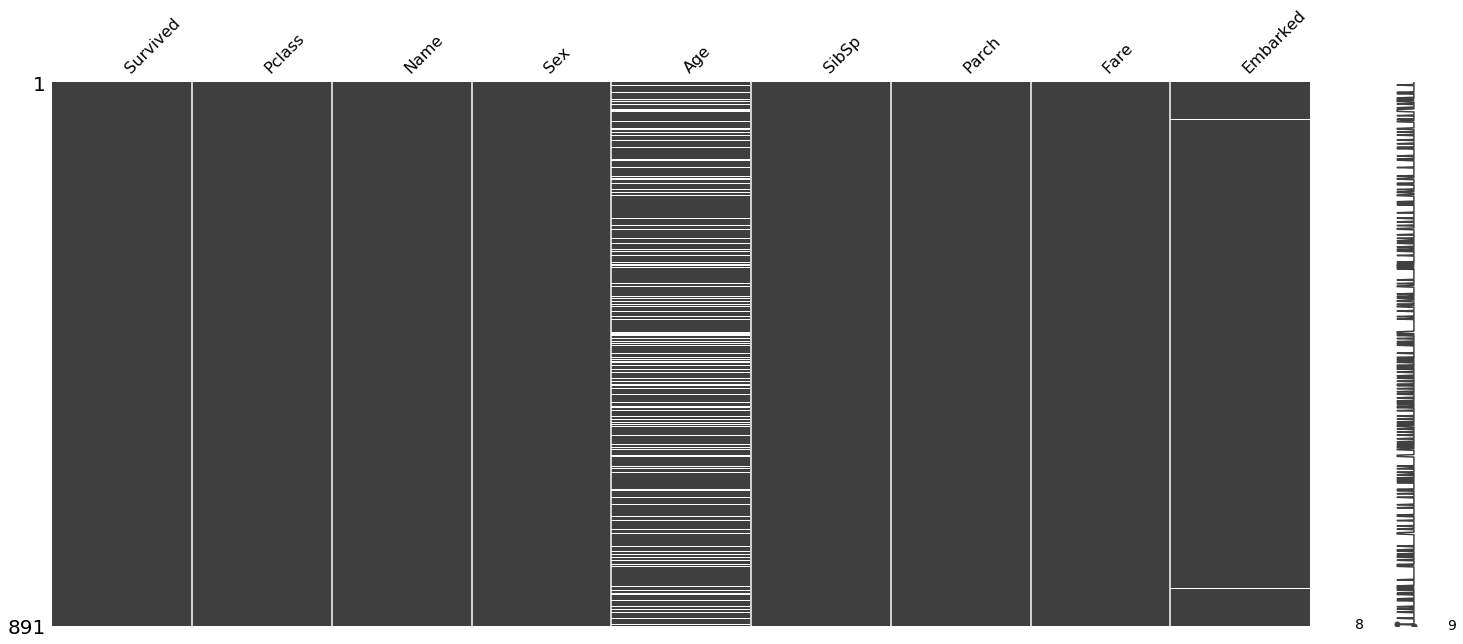

In [5]:
# Plot missing data
titanic.plot_missing_data()

In [6]:
titanic.get_missing_columns()

['Age', 'Embarked']

For each of 'Age' and 'Embarked': which are MCAR, MAR, or MNAR?
 * MCAR - Missing Completely at Random
    * When the probability of missing data on a variable is unrelated to any other measured variable and is unrelated to the variable with missing values itself.
         * Little's MCAR Test (abbreviated)
            1. Calculate the mean of each column with missing data.
            2. Calculate the mean of each column without missing data.
            3. If a majority of the columns have same/similar means, then it is LIKELY the data is MCAR.
         * We will perform a t-test on mean survival ('Survived') before and after removing the records with missing values.
 * MAR - Missing at Random
    * When the probability of missing data on a variable is related to some other measured variable in the model, but notto the value of the variable with missing values itself.
         * For example, when data are missing on IQ for a given threshold of age (i.e. children don't have an IQ score in the survey).
 * MNAR - Missing not at Random
    * When the missing values on a variable are related to the values of that variable itself, even after controlling for other variables.
         * For example, when data are missing on IQ and only the people with low IQ values have missing observations for this variable.

In [7]:
for col in titanic.missing_columns:
    print(col)
    if titanic.test_for_mcar(col):
        print("\tAssume equal means across samples, therefore MCAR.")
    else:
        print("\tAssume different means across samples, therefore not MCAR")
    print()

Age
	Assume equal means across samples, therefore MCAR.

Embarked
	Assume equal means across samples, therefore MCAR.



Therefore, we will operate under the assumption that both 'Age' and 'Embarked' are MCAR and imputation is a valid method for dealing with their missing values.

Python libraries we could use:
 * [statsmodels.imputation](https://www.statsmodels.org/devel/api.html#imputation)
 * [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)
 * [fancyimpute](https://github.com/iskandr/fancyimpute)
    * [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn-impute-iterativeimputer) == MICE
 * [autoimpute](https://github.com/kearnz/autoimpute)
 * [impyute](https://github.com/eltonlaw/impyute)
 * [datawig](https://github.com/awslabs/datawig)

Relevant forum discussion links:
 * [advice-on-imputing-temperature-data-with-statsmodels-mice](https://datascience.stackexchange.com/questions/52927/advice-on-imputing-temperature-data-with-statsmodels-mice)
 * [how-to-know-which-imputation-is-best-for-impute-my-dataset-from-multiple-imputat](https://stats.stackexchange.com/questions/188288/how-to-know-which-imputation-is-best-for-impute-my-dataset-from-multiple-imputat)

Informational links on topic:
 * [Imputation and Feature Selection](https://amueller.github.io/COMS4995-s18/slides/aml-08-021218-imputation-feature-selection)
 * [Python MICE + XGBoost + Regularized Linear Models](https://www.kaggle.com/mizioan/python-mice-xgboost-regularized-linear-models)
 * [Dealing With Missing Data In Python](https://s3.amazonaws.com/assets.datacamp.com/production/course_17404/slides/chapter4.pdf)
 * [Handling Missing Values in Machine Learning: Part 1](https://archive.is/6Izzd)
 * [Handling Missing Values in Machine Learning: Part 2](http://archive.is/zY1dd)
 * [Imputing missing values with variants of IterativeImputer](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py)

Before we start estimating imputed values and scoring them, we should encode our categorical variables.

In [8]:
titanic.encode_labels('Embarked')
titanic.encode_labels('Sex')
titanic.data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Code,Sex_Code
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,1


Next, we're going to extract the passenger's title from their name and encode the resulting column
.

In [9]:
titanic.extract_title()
titanic.encode_labels('Title')
titanic.data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Code,Sex_Code,Title,Title_Code
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,Mr,11
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,Mrs,12
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,0,Miss,8
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,12
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,1,Mr,11


Now, we will iterate over a handful of estimators for imputation strategies and score the results of each.

In [10]:
columns = titanic.data.select_dtypes('number').columns.tolist()

scorers = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
simple_strats = ['mean', 'median']

estimators = [
    BayesianRidge(), 
    DecisionTreeRegressor(max_features='sqrt'), 
    ExtraTreesRegressor(n_estimators=10), 
    KNeighborsRegressor(n_neighbors=15)
]

for scorer in scorers:
    try:
        results = score_impute_strategies(
            data=titanic.data,
            imp_target='Age',
            columns=columns,
            scorer=scorer,
            n_splits=20,
            max_iter=20,
            simple_strats=simple_strats,
            estimators=estimators
        )
        print(scorer)
        print(results.mean())
        print()
    except ValueError:
        pass

r2
Original          Full Data                0.362404
SimpleImputer     mean                     0.359668
                  median                   0.350493
IterativeImputer  BayesianRidge            0.373878
                  DecisionTreeRegressor    0.378996
                  ExtraTreesRegressor      0.361168
                  KNeighborsRegressor      0.363842
dtype: float64

neg_mean_squared_error
Original          Full Data               -0.147432
SimpleImputer     mean                    -0.145338
                  median                  -0.145215
IterativeImputer  BayesianRidge           -0.144727
                  DecisionTreeRegressor   -0.145722
                  ExtraTreesRegressor     -0.145072
                  KNeighborsRegressor     -0.145069
dtype: float64

neg_mean_absolute_error
Original          Full Data               -0.302917
SimpleImputer     mean                    -0.297019
                  median                  -0.296731
IterativeImputer  BayesianRidge   

Based on these results, we'll go with a DecisionTreeRegressor model to impute values for 'Age'.

In [11]:
columns = titanic.data.select_dtypes('number').columns.tolist()
estimator = DecisionTreeRegressor(max_features='sqrt')
max_iter = 20
titanic.impute_values(
    estimator=estimator,
    column='Age',
    columns=columns,
    max_iter=max_iter
)
titanic.data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Code,Sex_Code,Title,Title_Code,Age_Impute
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,Mr,11,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,Mrs,12,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,0,Miss,8,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,12,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,1,Mr,11,35.0


Next, we need to find a valid strategy for imputing missing values in the 'Embarked' column.

In [12]:
columns = titanic.data.select_dtypes('number').columns.tolist()
columns.remove('Age_Impute')
columns.remove('Age')

simple_strats = ['most_frequent']
estimators = [
    LogisticRegression(multi_class='auto'), 
    DecisionTreeClassifier(), 
    ExtraTreesClassifier(n_estimators=10), 
    KNeighborsClassifier(n_neighbors=15)
]
scorers = ['accuracy', 'roc_auc', 'f1', 'recall', 'precision']

for scorer in scorers:
    try:
        results = score_impute_strategies(
            data=titanic.data,
            imp_target='Embarked_Code',
            columns=columns,
            scorer=scorer,
            n_splits=20,
            max_iter=20,
            simple_strats=simple_strats,
            estimators=estimators
        )
        print(scorer)
        print(results.mean())
        print()
    except ValueError:
        pass

accuracy
Original          Full Data                 0.794520
SimpleImputer     most_frequent             0.791212
IterativeImputer  LogisticRegression        0.792273
                  DecisionTreeClassifier    0.789848
                  ExtraTreesClassifier      0.794899
                  KNeighborsClassifier      0.792020
dtype: float64

roc_auc
Original          Full Data                 0.843061
SimpleImputer     most_frequent             0.844388
IterativeImputer  LogisticRegression        0.846897
                  DecisionTreeClassifier    0.840738
                  ExtraTreesClassifier      0.835699
                  KNeighborsClassifier      0.837194
dtype: float64

f1
Original          Full Data                 0.717586
SimpleImputer     most_frequent             0.715311
IterativeImputer  LogisticRegression        0.717302
                  DecisionTreeClassifier    0.712851
                  ExtraTreesClassifier      0.708916
                  KNeighborsClassifier      0.6

Based on these results, we'll go with a LogisticRegression model to impute values for 'Embarked_Code'.

In [13]:
columns = titanic.data.select_dtypes('number').columns.tolist()
columns.remove('Age_Impute')
columns.remove('Age')
estimator = LogisticRegression(multi_class='auto')
max_iter = 20
titanic.impute_values(
    estimator=estimator,
    column='Embarked_Code',
    columns=columns,
    max_iter=max_iter
)
titanic.data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Code,Sex_Code,Title,Title_Code,Age_Impute,Embarked_Code_Impute
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,Mr,11,22.0,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,Mrs,12,38.0,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,0,Miss,8,26.0,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,12,35.0,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,1,Mr,11,35.0,2.0


In [14]:
titanic.decode_dict

{'Embarked': {0: 'C', 1: 'Q', 2: 'S', 3: 'nan'},
 'Sex': {0: 'female', 1: 'male'},
 'Title': {0: 'Capt',
  1: 'Col',
  2: 'Don',
  3: 'Dr',
  4: 'Jonkheer',
  5: 'Lady',
  6: 'Major',
  7: 'Master',
  8: 'Miss',
  9: 'Mlle',
  10: 'Mme',
  11: 'Mr',
  12: 'Mrs',
  13: 'Ms',
  14: 'Rev',
  15: 'Sir',
  16: 'the Countess'}}

## 3. Review descriptive statistics and make note of special values.
 * Special values may lead to new questions related to target variable.

### 3.1 What was the survival rate of women versus men?

,Sex,Survived
0,male,0.188908
1,female,0.742038


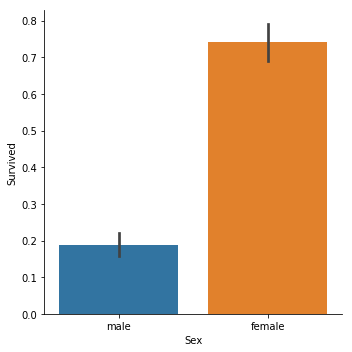

In [15]:
sns.catplot(x="Sex", y="Survived", data=titanic.data, kind='bar', orient='v')
titanic.get_target_correlation('Sex')

The plot above shows women aboard the Titanic had a higher survival rate than men.

### 3.2 What was the survival rate of children versus adults?

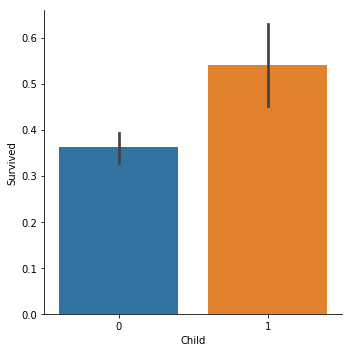

In [16]:
titanic.data['Child'] = 0
titanic.data.loc[titanic.data['Age']<18, 'Child'] = 1
sns.catplot(x="Child", y="Survived", data=titanic.data, kind='bar', orient='v')

There doesn't appear to be as much of a disparity here as we saw previously with survival rates of men and women.

What would these surival rates look like if we encode sex and the child flag?

### 3.5 What was surival rate of sex encoded with a child flag?

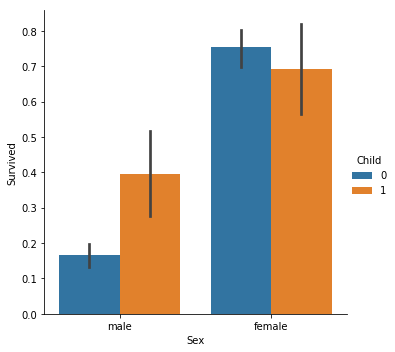

In [17]:
sns.catplot(x="Sex", y="Survived", hue="Child",data=titanic.data, kind='bar', orient='v')

The plot above shows despite low survival rate among men, male children enjoyed a marginally higher chance of survival. As we already observed in a previous plot, women, in general, had a much higher survival rate.

This plot alone lends credence to the notion that women and children were saved before men. Well, they at least *tried* to save them.

### 3.3 Did passenger socio-economic status play a role in survival?

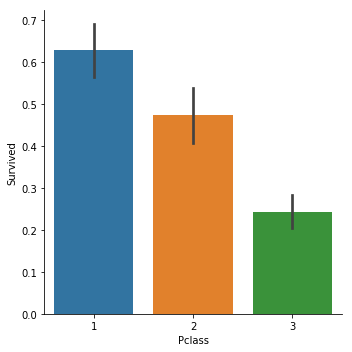

In [18]:
sns.catplot(x="Pclass", y="Survived",data=titanic.data, kind='bar', orient='v')

This plot shows that the higher the class of the passenger, the greater the likelihood of survival.

### 3.4 How does age affect a passengers survival?
 * What if age is compounded with sex?
 * Or with class?

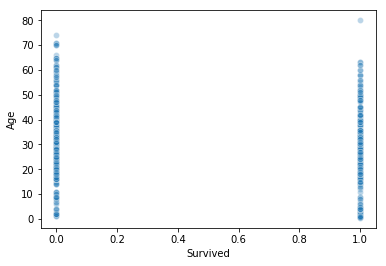

In [19]:
sns.scatterplot(x='Survived', y='Age', data=titanic.data, alpha=0.3)

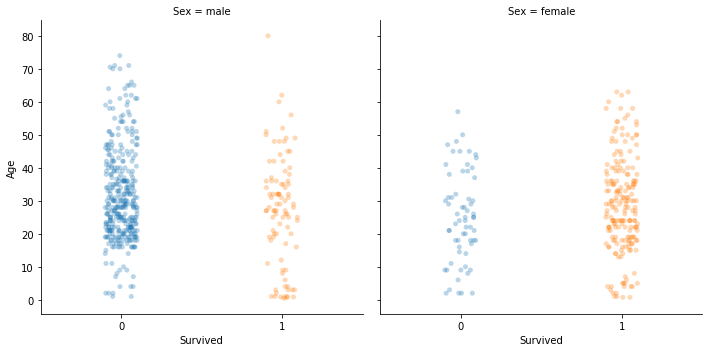

In [20]:
sns.catplot(x='Survived', y='Age', col='Sex', data=titanic.data, alpha=.3)

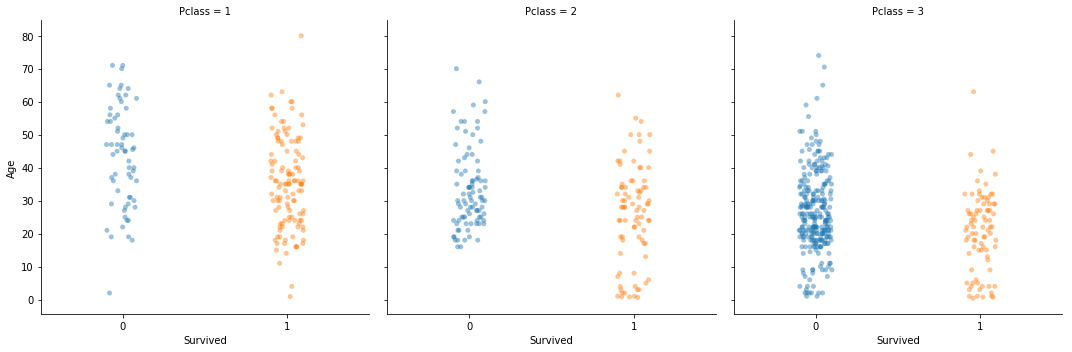

In [21]:
sns.catplot(x='Survived', y='Age', col='Pclass', data=titanic.data, alpha=.45)

It appears as though there is a high density of younger passengers that didn't survive in 3rd class. Other than that, there doesn't appear to be any meaningful or discernable trends among age and survival.

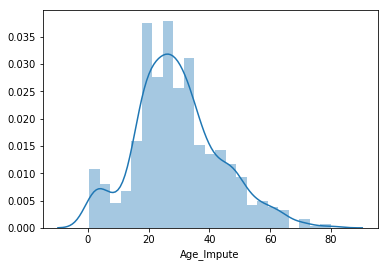

In [22]:
sns.distplot(titanic.data['Age_Impute'])

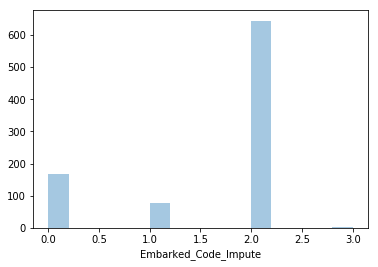

In [23]:
sns.distplot(titanic.data['Embarked_Code_Impute'], kde=False)

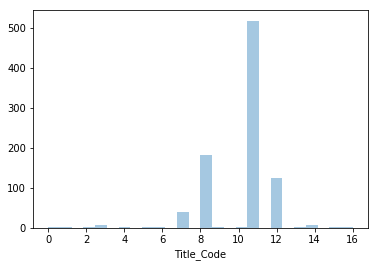

In [24]:
sns.distplot(titanic.data['Title_Code'], kde=False)

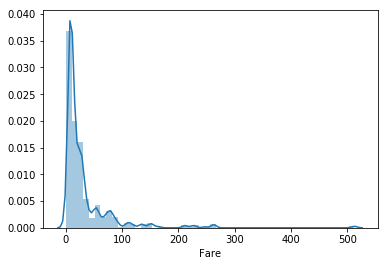

In [25]:
sns.distplot(titanic.data['Fare'])

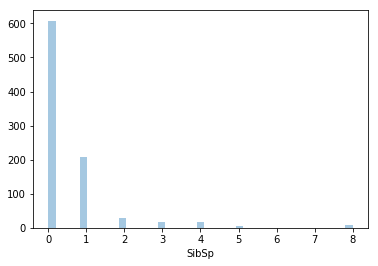

In [26]:
sns.distplot(titanic.data['SibSp'], kde=False)

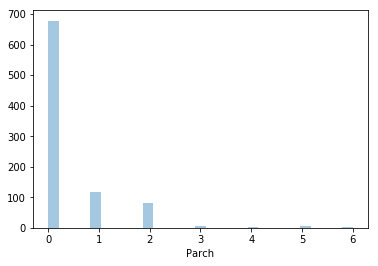

In [27]:
sns.distplot(titanic.data['Parch'], kde=False)

The 'Age' column appears to be the feature that is close to a normal distribution. Other than that, they are all mostly positively skewed.